In [1]:
!pip install --upgrade git+https://github.com/GeoBigData/sensortools.git@master -q

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from gbdxtools import Interface
gbdx = Interface()

# DG Sensor Tools
from sensortools import sensortools
st = sensortools()

# Inputs

In [3]:
# GB of data equates to how many square kilometers of imagery?
gb = 100

# Square kilometers of imagery equates to how many GB of data?
km2 = 10

# What is the AOI? We'll use this in an image catalog search. And map out relative areas. Just needs to be WKT.
aoi = "POLYGON((-113.88 40.36,-110.28 40.36,-110.28 37.56,-113.88 37.56,-113.88 40.36))"

# What is the start date of your image search?
start_date = '2010-01-01T00:00:00.000Z'

# What is the end date of your image search?
end_date = '2012-01-01T00:00:00.000Z'

# Any filters you'd like to add to the image search? 
filters = None

### Filter Examples

filters = [
'cloudCover < 10',
'offNadirAngle < 15',
'imageBands = Pan_MS1_MS2'
]

In [4]:
# Convert GB to km2, return for all sensors as pandas df
# if you know the GB of the account, then determine area coverage
st.gb_to_km2(gb)

,Sensor,Resolution (m),Band Count,Area (km2)
0,GE01_Pan,0.41,1,4512
1,GE01_MS,1.64,4,18049
2,WV01_Pan,0.50,1,6710
3,WV02_Pan,0.46,1,5680
4,WV02_MS,1.85,8,11484
5,WV03_Pan,0.31,1,2579
6,WV03_MS,1.24,8,5159
7,WV03_SWIR,3.70,8,45936
8,WV04_Pan,0.31,1,2579
9,WV04_MS,1.24,4,10318


In [5]:
# Convert km2 to GB, return for all sensors as pandas df
# if you know the km2 requested, how many GB does this translate to? Can determine tier 
st.km2_to_gb(km2)

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,0.221612
1,GE01_MS,1.64,4,0.0554029
2,WV01_Pan,0.50,1,0.149012
3,WV02_Pan,0.46,1,0.176053
4,WV02_MS,1.85,8,0.0870776
5,WV03_Pan,0.31,1,0.387647
6,WV03_MS,1.24,8,0.193824
7,WV03_SWIR,3.70,8,0.0217694
8,WV04_Pan,0.31,1,0.387647
9,WV04_MS,1.24,4,0.0969118


In [6]:
# Perhaps we know the AOI extent, so what is the AOI's area?
# returns in km2 
st.aoiArea(aoi)

96919.77084773929

In [7]:
# lets map the AOI
st.mapAOI(aoi)

In [8]:
# we can use the AOI area to see how this translates to GB of imagery
st.km2_to_gb(st.aoiArea(aoi))

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,2147.85
1,GE01_MS,1.64,4,536.964
2,WV01_Pan,0.50,1,1444.22
3,WV02_Pan,0.46,1,1706.31
4,WV02_MS,1.85,8,843.954
5,WV03_Pan,0.31,1,3757.07
6,WV03_MS,1.24,8,1878.53
7,WV03_SWIR,3.70,8,210.989
8,WV04_Pan,0.31,1,3757.07
9,WV04_MS,1.24,4,939.267


In [9]:
# Perhaps we have a specific datetime range in mind, then we need to conduct image search...
# we may not have the coverage, check out what we have and return the results in something we can parse
results = gbdx.catalog.search(searchAreaWkt=aoi, startDate=start_date, endDate=end_date, filters=filters)

In [10]:
# We must format our search results into something that we can plot and use
df = st.formatSearchResults(results, aoi=aoi)
# take a look at the formatted results. This can be use by itself, or use built-in plot (below)
# .head() just returns the top 5 of the results, there are many more! 
df.head()

,Sensor,Date,Cloud Cover,Off Nadir Angle,Sun Elevation,Footprint WKT,Footprint AOI Inter Percent,x
2010-01-05 18:14:14.446,QUICKBIRD02,2010-01-05 18:14:14.446,17,24.106699,25.488941,"MULTIPOLYGON(((-110.4067753 40.01061926, -110....",0.279465,0
2010-01-06 18:33:25.549,WORLDVIEW01,2010-01-06 18:33:25.549,99,16.899406,26.977633,"MULTIPOLYGON(((-110.7061659 40.02044999, -110....",2.227988,1
2010-01-10 18:19:28.842,QUICKBIRD02,2010-01-10 18:19:28.842,0,22.038029,25.979027,"MULTIPOLYGON(((-112.9973224 39.90942791, -112....",1.475397,2
2010-01-10 18:21:16.599,WORLDVIEW02,2010-01-10 18:21:16.599,4,24.341316,25.229422,"MULTIPOLYGON(((-111.8415745 40.40277061, -112....",0.000001,3
2010-01-10 18:39:48.538,WORLDVIEW01,2010-01-10 18:39:48.538,0,4.975203,28.336439,"MULTIPOLYGON(((-112.5841051 39.01847689, -112....",2.120907,4


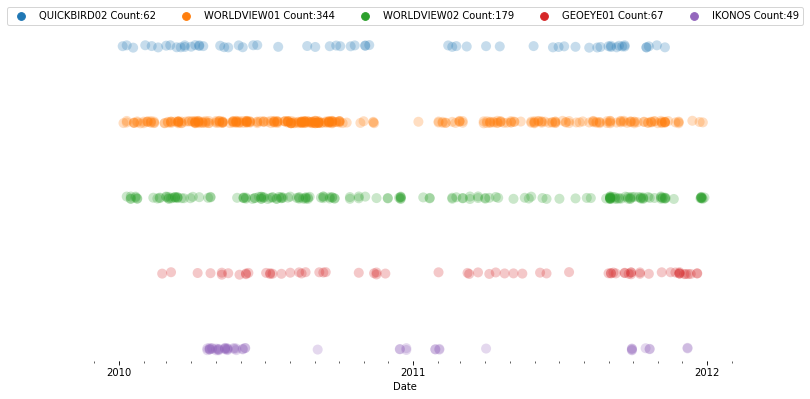

In [11]:
# Plot the results of our image search
# Legend shows counts of imagery found by sensor, dots show coverage over time 
st.searchScatterPlot(df)

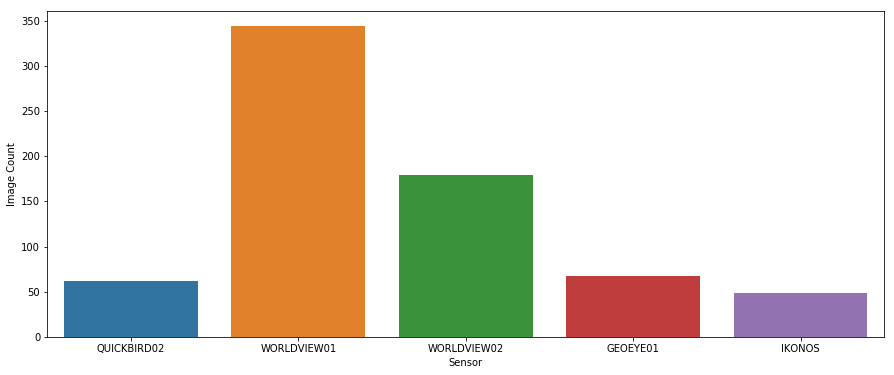

In [12]:
# barplot showing counts of imagery for AOI
st.searchBarPlot(df)

In [13]:
# How can we use the count results from the plot?
# Lets say we have an AOI that we estimate to be around 10 km2. WE know we want as much WV2 imagery
# from 2010-2012 as we can get 
st.km2_to_gb(10 * 179)
# looking at table below, we see WV2 Pan is ~31 GB and WV2 MS is ~15 GB 

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,39.6685
1,GE01_MS,1.64,4,9.91712
2,WV01_Pan,0.50,1,26.6731
3,WV02_Pan,0.46,1,31.5136
4,WV02_MS,1.85,8,15.5869
5,WV03_Pan,0.31,1,69.3889
6,WV03_MS,1.24,8,34.6944
7,WV03_SWIR,3.70,8,3.89672
8,WV04_Pan,0.31,1,69.3889
9,WV04_MS,1.24,4,17.3472


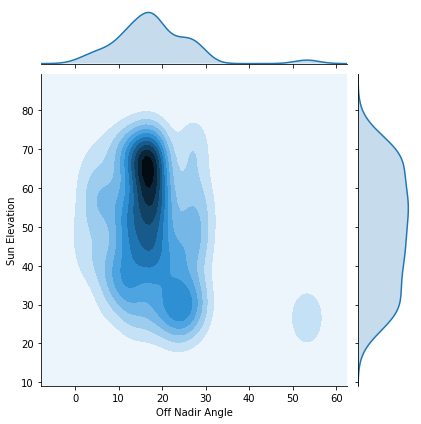

In [14]:
# in some cases we want to see more details of the properties of the image coverage we have
# searchVarPlot allows you to compare two variables for images returned in search 
# you can optionally feed in one sensor to focus in on its results
# in the plot below, you can see the majority of our WV2 images have an off nadir angle between 10-20
# and a sun elevation between 60-70
st.searchVarPlot(df, var1='Off Nadir Angle', var2='Sun Elevation', sensor='WORLDVIEW02')

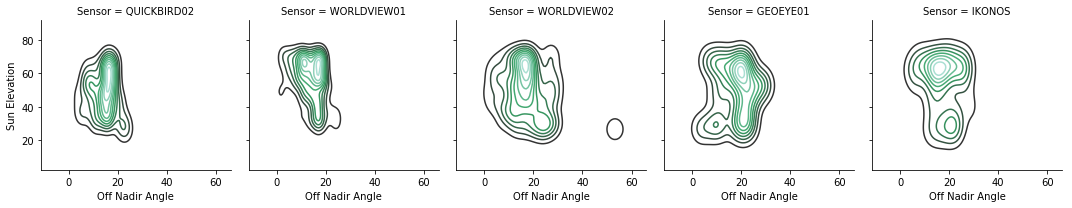

In [21]:
# or, we can compare all sensors together at once 
st.searchSensorComparePlot(df, var1='Off Nadir Angle', var2='Sun Elevation')

In [14]:
# How does sensor GB translate to area on a map? 
# change the GB allotment and see the extent coverage for each sensor
# change the initial location by inputing aoi=[lat, lon] into the function (otherwise defaults to Denver, CO)
# or simply feed in the WKT polygon aoi from the main inputs and a centroid will be calculated
st.mapGB(gb=100)

In [15]:
# showing another location
st.mapGB(gb=100, aoi=[35.68, 139.69])

In [16]:
# or we can feed in the AOI, which initializes our map at the center of the AOI 
st.mapGB(gb=100, aoi=aoi)

# Advanced summaries for the search results

In [17]:
# return dataframe with count of sensors between date
df.groupby(['Sensor']).count()

,Date,Cloud Cover,Off Nadir Angle,Sun Elevation,Footprint WKT,Footprint AOI Inter Percent,x
Sensor,,,,,,,
GEOEYE01,67,67,67,67,67,67,67
IKONOS,49,49,49,49,49,49,49
QUICKBIRD02,62,62,62,62,62,62,62
WORLDVIEW01,344,344,344,344,344,344,344
WORLDVIEW02,179,179,179,179,179,179,179


In [18]:
# taking a step further, how many images are available by sensor, year, and month? 
df.groupby(['Sensor', df.index.year, df.index.month]).count().head(20)

Date  Cloud Cover  Off Nadir Angle  Sun Elevation  \
Sensor                                                                
GEOEYE01 2010 2      1            1                1              1   
              3      1            1                1              1   
              4      2            2                2              2   
              5      4            4                4              4   
              6      3            3                3              3   
              7      5            5                5              5   
              8      4            4                4              4   
              9      3            3                3              3   
              10     1            1                1              1   
              11     4            4                4              4   
         2011 2      1            1                1              1   
              3      3            3                3              3   
              4      3            3                3              3   
              5      2            2                2              2   
              6      2            2                2              2   
              7      1            1                1              1   
              8      1            1                1              1   
              9     10           10               10             10   
              10     3            3                3              3   
              11     7            7                7              7   

                  Footprint WKT  Footprint AOI Inter Percent   x  
Sensor                                                            
GEOEYE01 2010 2               1                            1   1  
              3               1                            1   1  
              4               2                            2   2  
              5               4                            4   4  
              6               3                            3   3  
              7               5                            5   5  
              8               4                            4   4  
              9               3                            3   3  
              10              1                            1   1  
              11              4                            4   4  
         2011 2               1                            1   1  
              3               3                            3   3  
              4               3                            3   3  
              5               2                            2   2  
              6               2                            2   2  
              7               1                            1   1  
              8               1                            1   1  
              9              10                           10  10  
              10              3                            3   3  
              11              7                            7   7

In [28]:
st.mapSearchFootprintsAOI(df, aoi)